In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
from sklearn.cluster import KMeans

%matplotlib inline

In [225]:
direcao = 1
dfRealTime = pd.read_csv('dados/vehicles_1602262119519.txt')
dfRotaReal = dfRealTime[dfRealTime.vehicle_id=='1_51230'][dfRealTime[' route_direction']==direcao]
dfRotaReal[:1]

<ipython-input-225-73c95470e58d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfRotaReal = dfRealTime[dfRealTime.vehicle_id=='1_51230'][dfRealTime[' route_direction']==direcao]


,vehicle_id,route_id,route_direction,timestamp,lat,lng
39,1_51230,ed5ea2bf-7194-42fb-89a9-8794a74a27df,1,1602250976000,-23.547342,-46.629297


In [226]:
routeId = 'ed5ea2bf-7194-42fb-89a9-8794a74a27df'
dfRotas = pd.read_csv('dados/routes.txt')
dfRotaSelecionada = dfRotas[dfRotas.route_id==routeId]
dfRotaSelecionada[:1]

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color,route_text_color
936,ed5ea2bf-7194-42fb-89a9-8794a74a27df,9b0f9c54-95d2-4b66-a586-274ea116e64f,4491-10,Zoológico - Term. Pq. D. Pedro Ii,NaN,3,006341,FFFFFF


In [227]:
agencyId = '9b0f9c54-95d2-4b66-a586-274ea116e64f'
dfAgency = pd.read_csv('dados/agency.txt')
dfAgencySelecionada = dfAgency[dfAgency.agency_id==agencyId]
dfAgency[:1]

,agency_id,agency_name,agency_url,agency_timezone,agency_phone,agency_lang
0,9b0f9c54-95d2-4b66-a586-274ea116e64f,SPTRANS,http://www.sptrans.com.br/?versao=081020,America/Sao_Paulo,NaN,pt


In [228]:
tripId = 'cfc2a254-e671-44f1-9a20-6a68d895e4ea_USD'
dfStopTimes = pd.read_csv('dados/stop_times.txt')
dfStopByTrip = dfStopTimes[dfStopTimes.trip_id==tripId]
dfStopByTrip.info()
dfStopTimes[:1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   trip_id         0 non-null      object
 1   arrival_time    0 non-null      object
 2   departure_time  0 non-null      object
 3   stop_id         0 non-null      object
 4   stop_sequence   0 non-null      int64 
 5   stop_headsign   0 non-null      object
dtypes: int64(1), object(5)
memory usage: 0.0+ bytes


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign
0,af90fc25-c5e3-4a13-93f8-ab9d0611c5da_USD,06:00:00,06:00:00,cba155c4-8c00-4335-9952-f42a5cc92bb1,1,Div. De Ferraz


In [229]:
dfTrips = pd.read_csv('dados/trips.txt')
dfTripByRoute = dfTrips[dfTrips.route_id==routeId][dfTrips.direction_id==direcao]
dfTripByRoute

<ipython-input-229-226d2acf65ff>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfTripByRoute = dfTrips[dfTrips.route_id==routeId][dfTrips.direction_id==direcao]


,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id


In [230]:
shapeZooId = 'cfc2a254-e671-44f1-9a20-6a68d895e4ea'
dfShapes = pd.read_csv('dados/shapes.txt')
dfShapeZoo = dfShapes[dfShapes.shape_id==shapeZooId]
dfShapeZoo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 781654 to 782013
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shape_id           360 non-null    object 
 1   shape_pt_lat       360 non-null    float64
 2   shape_pt_lon       360 non-null    float64
 3   shape_pt_sequence  360 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 14.1+ KB


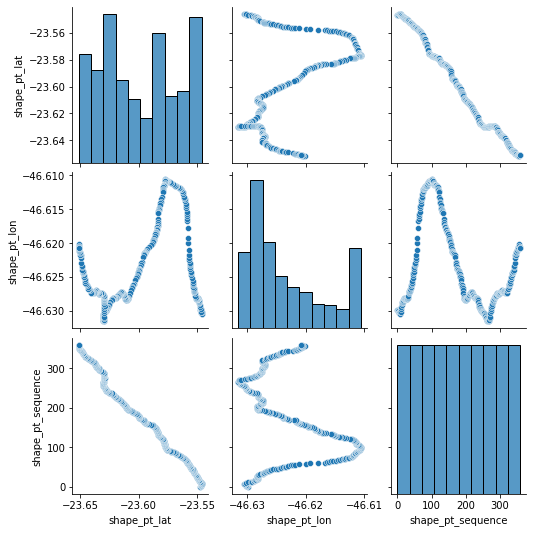

In [231]:
sb.pairplot(dfShapeZoo)

In [232]:
dfShapeZoo = dfShapeZoo.rename(columns={'shape_pt_lat':'lat', 'shape_pt_lon':'long'})
dfShapeZooPre = dfShapeZoo.drop(axis=1,labels=["shape_id","shape_pt_sequence"])
dfShapeZooPre["origin"] = np.full(dfShapeZooPre.__len__(), "shape")
dfComparar = dfShapeZooPre

dfRotaReal = dfRotaReal.rename(columns={'lng':'long'})
dfRotaRealPre = dfRotaReal.drop(axis=1,labels=["vehicle_id","route_id"," route_direction","timestamp"])
dfRotaRealPre["origin"] = np.full(dfRotaRealPre.__len__(), "real")
dfComparar = dfComparar.append(dfRotaRealPre)


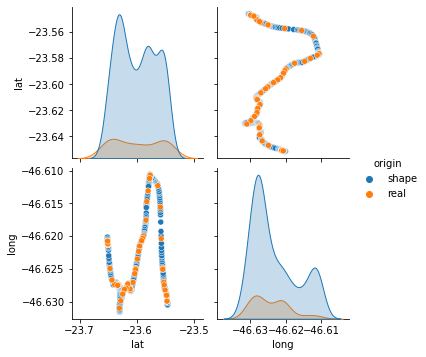

In [233]:
sb.pairplot(dfComparar, hue="origin")